<a href="https://colab.research.google.com/github/henriquepgomide/blog-youtube-tutorials/blob/master/Pycaret2_x_Machine_Learning_for_People_with_Deadlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/3gQtwjX.png)

# PyCaret - Aprendizagem de Máquinas para quem tem prazo 







## 0.0 - Introdução

Olá! Nosso objetivo hoje será apresentar a biblioteca PyCaret, que facilita a 
implementação de modelos de aprendizagem de máquinas

1.   Apresentar biblioteca PyCaret
2.   Instalar PyCaret
3.   Processar dados
4.   Treinar modelos
5.   Comparar resultados dos modelos
6.   Conclusões


### Banco de dados

Iremos usar o banco de dados 'insurance' para treinar nosso modelo. Você
encontra o banco neste link: 

* https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv

#### Descrição do banco de dados

* age...........Idade em anos
* sex...........Sexo
* bmi...........Índice de Massa Corporal
* children ...Número de crianças 
* smoker.....Se é fumante
* region.......Região dos Estados Unidos
* charges....Sinistro em unidade monetária

## 1.0 - PyCaret, o que é?


PyCaret é uma biblioteca de código aberto e que necessita pouco código de programação para preparar seus dados e desenvolver seu modelo de aprendizagem de máquinas no seu ambiente de preferência. Ela funciona até no PowerBI :)

Para maiores detalhes, consultar o [site oficial](https://pycaret.org/). 

### Vantagens

* Pouco código para implementar algoritmos de aprendizagem supervisionada e não
supervisionada.
* Algoritmos atuais já estão incluídos (e.g., lightGBM)

### Desvantagens

* Documentação incompleta
* Filosofia baterias incluídas carregará pacotes desnecessários

## 2.0 - Instalar PyCaret

Dica: Lembre-se de usar um ambiente virtual. Versão do Python suportada oficialmente 3.6.

In [ ]:
# Instalar PyCaret
!pip install pycaret

In [ ]:
# Carregar bibliotecas
import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pycaret
from pycaret.regression import *  
from pycaret.utils import enable_colab

## 3.0 Processar dados


1.   Carregar dados
2.   Separar dados para treino e teste.

In [ ]:
URL = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv'
df = pd.read_csv(URL)
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Separar banco de dados
train, test = train_test_split(df, test_size=0.2,
                                     random_state=42)

In [ ]:
# Regressão ou classificação?
# Documentação SETUP https://pycaret.org/setup/
# Documentação para método setup regression 
#     https://pycaret.org/regression/

reg = setup(data = train, 
              target = 'charges', 
              train_size = 0.7)

,Description,Value
0,session_id,4539
1,Target,charges
2,Original Data,"(1070, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(748, 14)"


## 4.0 Treinar e Comparar Modelos

Vamos olhar a documentação, antes de iniciar o treino.


```
compare_models(blacklist = None, fold = 10,  round = 4,  sort = ‘R2’, turbo = True)
```

Documentação: https://pycaret.org/regression/ 

In [ ]:
# Treinar modelos
compare_models(round=3, sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2757.342,2.333011e+07,4757.101,0.831,0.446,0.324,0.080
catboost,CatBoost Regressor,2827.820,2.450793e+07,4876.245,0.822,0.484,0.332,0.764
rf,Random Forest Regressor,2892.851,2.554301e+07,4993.911,0.814,0.485,0.346,0.527
lightgbm,Light Gradient Boosting Machine,3146.058,2.634879e+07,5057.911,0.809,0.523,0.389,0.052
et,Extra Trees Regressor,2818.224,2.796021e+07,5202.507,0.797,0.476,0.319,0.464
xgboost,Extreme Gradient Boosting,3189.941,2.873355e+07,5304.851,0.791,0.542,0.383,0.503
ada,AdaBoost Regressor,4201.049,2.967070e+07,5418.154,0.786,0.601,0.665,0.030
llar,Lasso Least Angle Regression,4400.218,4.023331e+07,6282.593,0.711,0.551,0.429,0.015
ridge,Ridge Regression,4419.996,4.026155e+07,6285.304,0.711,0.565,0.432,0.015
lasso,Lasso Regression,4405.693,4.026186e+07,6284.651,0.711,0.568,0.430,0.016


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4539, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Avaliar performance do Modelo de Baseline
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2223.0131,1.757335e+07,4192.0580,0.8672,0.3827,0.2550
1,2589.4987,1.977664e+07,4447.0932,0.8364,0.4392,0.3520
2,2760.2909,2.700045e+07,5196.1959,0.8512,0.4415,0.3336
3,3320.7653,3.731632e+07,6108.7082,0.6848,0.3987,0.2628
4,2351.3231,1.535357e+07,3918.3638,0.8864,0.4236,0.2722
5,3002.1459,2.908293e+07,5392.8593,0.8434,0.5184,0.2762
6,3304.3290,2.990082e+07,5468.1645,0.7788,0.5168,0.3489
7,2643.2119,2.143164e+07,4629.4315,0.7675,0.4810,0.4156
8,2304.7404,9.518691e+06,3085.2376,0.9389,0.3635,0.3425
9,3074.1020,2.634666e+07,5132.8994,0.8542,0.4936,0.3772


In [ ]:
# Tunar Modelo
gbr_tuned = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3157.3962,1.906194e+07,4365.9987,0.8560,0.7292,0.4182
1,3776.2734,3.045511e+07,5518.6145,0.7480,0.5378,0.5295
2,3416.2713,3.022557e+07,5497.7789,0.8334,0.6214,0.4635
3,4069.4020,4.398561e+07,6632.1647,0.6285,0.5193,0.3962
4,3547.2084,2.271874e+07,4766.4175,0.8318,0.6130,0.4968
5,4057.6363,4.198644e+07,6479.6948,0.7740,0.6230,0.3939
6,3783.0266,3.715546e+07,6095.5282,0.7252,0.7055,0.4437
7,3271.4276,2.430088e+07,4929.5928,0.7364,0.5907,0.4915
8,2820.1478,1.600668e+07,4000.8353,0.8973,0.4547,0.4350
9,3570.8657,3.136766e+07,5600.6843,0.8264,0.5556,0.4482


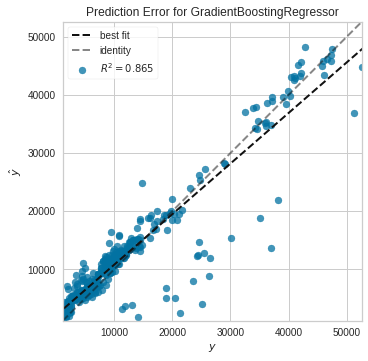

In [ ]:
# Comparar predições e resultados do banco de teste
plot_model(gbr, plot='error')

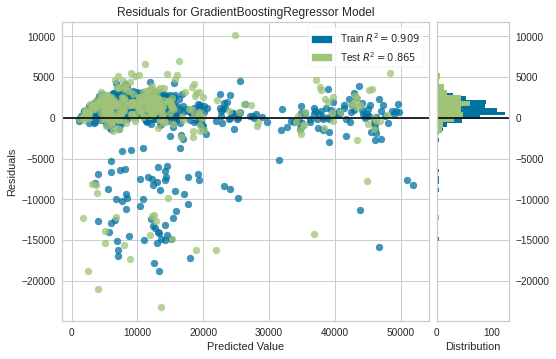

In [ ]:
# Comparar os resíduos
plot_model(gbr, plot='residuals')

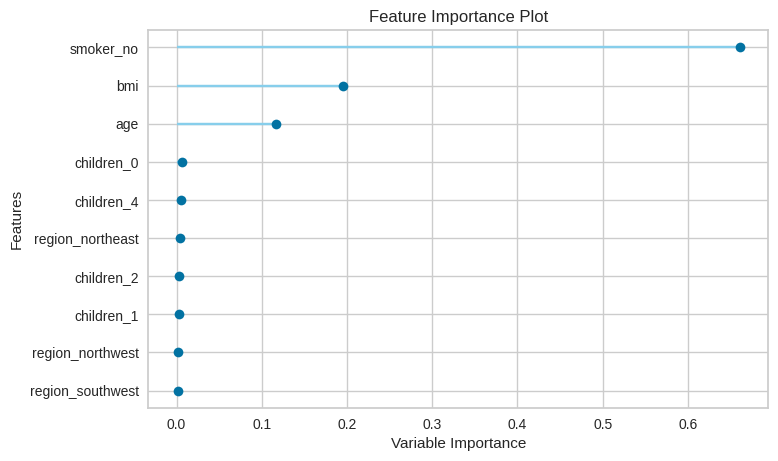

In [ ]:
plot_model(gbr, 'feature')

## 5.0 Salvar modelo

In [ ]:
gbr_holdout = predict_model(gbr, data=test)

In [ ]:
gbr_holdout

,age,sex,bmi,children,smoker,region,charges,Label
764,45,female,25.175,2,no,northeast,9095.06825,11858.132902
887,36,female,30.020,0,no,northwest,5272.17580,5981.007793
890,64,female,26.885,0,yes,northwest,29330.98315,28514.189538
1293,46,male,25.745,3,no,northwest,9301.89355,10498.021695
259,19,male,31.920,0,yes,northwest,33750.29180,34507.974934
...,...,...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast,47055.53210,45651.473479
575,58,female,27.170,0,no,northwest,12222.89830,13305.449107
535,38,male,28.025,1,no,northeast,6067.12675,6711.853685
543,54,female,47.410,0,yes,southeast,63770.42801,46644.080389


In [ ]:
# Finalize model
final_gbr = finalize_model(gbr)

In [ ]:
# Save Model
save_model(final_gbr, 'my_gbr_pycaret_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

## 6.0 Conclusões

* PyCaret oferece um rápido caminho para desenvolvimento de protótipos
* No entanto, não substituí as implementações scikit.learn, numpy e pandas.